## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [2]:
models = pd.read_csv('../../Data/neo_task_smoted.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Подбираем гиппер-параметры.

In [3]:
gaussian_naive_bayes_optimal_n_neighbors = GridSearchCV(GaussianNB(), 
                                                        {'var_smoothing': np.arange(0, 1, 1e-1),
                                                         }, 
                                                         scoring=accuracy_score).fit(X_train, y_train)
gaussian_naive_bayes_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=67670    False
34476    False
27024    False
34059    False
36673    False
         ...  
81031    False
46244    False
19380    False
259      False
38324    False
Name: hazardous, Length: 13281, dtype: bool as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Mike

{'var_smoothing': 0.0}

# Формула Байеса

In [4]:
gaussian_naive_bayes = GaussianNB(var_smoothing=gaussian_naive_bayes_optimal_n_neighbors.best_params_['var_smoothing'])
gaussian_naive_bayes.fit(X_train, y_train)
y_predicted_by_gaussian_naive_bayes = gaussian_naive_bayes.predict(X_test)

# Оценка качества 

In [5]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_gaussian_naive_bayes))

Accuracy
0.860853851366614


In [6]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_gaussian_naive_bayes))

Confusion matrix
[[18460  1489]
 [ 1591   595]]


In [7]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_gaussian_naive_bayes))

Precision, Recall, F
               precision    recall  f1-score   support

       False       0.92      0.93      0.92     19949
        True       0.29      0.27      0.28      2186

    accuracy                           0.86     22135
   macro avg       0.60      0.60      0.60     22135
weighted avg       0.86      0.86      0.86     22135



ROC AUC score


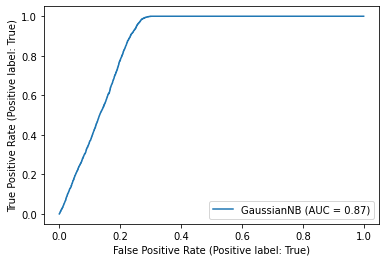

In [8]:
print('ROC AUC score') 
plot_roc_curve(gaussian_naive_bayes, X_test, y_test)

In [ ]:
dump(gaussian_naive_bayes, '../../Pipelines/Laba1/LineRegressions/LineRegressionClassicModel.sav')